# General PLS Regression models

## Import libraries

In [8]:
from selectivePLS import selectivePLS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Settings

In [9]:
test_size = 0.2 # Proportion of the test data size
n_components = 5 # The number of latent components
latent_to = 6 # Variables of column number 1 to "latent_to" of design matrix X are transfomed to latent variables

## Sample dataset

In [10]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_data = pd.DataFrame(data = housing.data, columns = housing.feature_names)
housing_data['target'] = housing.target

In [11]:
housing_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Data preparation
### selectivePLS package requires standardized features array X and target array y.

In [12]:
# Transformation to ndarray from DataFrame
X = housing_data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population','AveOccup', 'Latitude', 'Longitude']].values
y = housing_data[['target']].values

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 1)

# Standardization
scaler_X = StandardScaler()
scaler_y = StandardScaler()
scaler_X.fit(X_train)
scaler_y.fit(y_train)

X_train = scaler_X.transform(X_train)
y_train = scaler_y.transform(y_train)
X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test)

## PLS model fitting

In [13]:
model = selectivePLS(n_components = n_components)
model.fit(X_train, y_train, latent_to = latent_to)

## PLS model functions

In [18]:
y_pred = model.predict(X_test)
y_pred

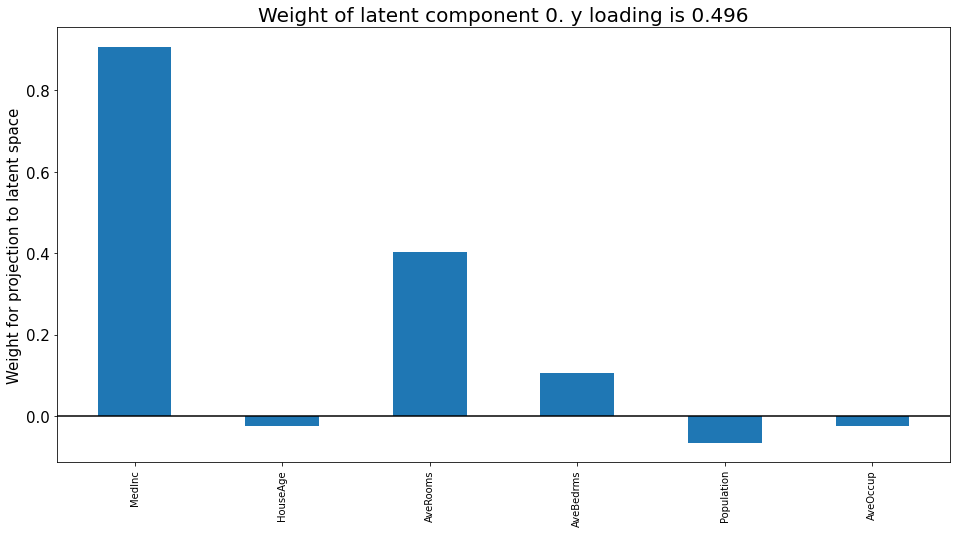

In [27]:
# Show weight for transformation to latent variables from raw variables
latent_component_no = 0
model.show_weight_plot(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population','AveOccup'], latent_component_no)